In [171]:
import statistics

def show_results(mae_values, mpe_values):
    avg_mae = statistics.mean(mae_values)
    avg_mpe = statistics.mean(mpe_values)
    med_mae = statistics.median(mae_values)
    med_mpe = statistics.median(mpe_values)
    print('Average MAE: %.3f' % avg_mae)
    print('Average MPE: %.3f' % avg_mpe)
    print('Median MAE: %.3f' % med_mae)
    print('Median MPE: %.3f' % med_mpe)
    
"""show_results(plot_data, mae_list, rmse_list, mpe_list)
print(len(rmse_list))"""

'show_results(plot_data, mae_list, rmse_list, mpe_list)\nprint(len(rmse_list))'

# Prophet results

In [157]:
import pandas as pd

types_dict = {"postal code": str, "rmse": float, "mae": float, "mpe": float, "parameter": float}

one_room = pd.read_csv("parameter_tuning_results/one-room-parameter-tuning-results.csv", index_col=[0], dtype=types_dict)
two_room = pd.read_csv("parameter_tuning_results/two-room-parameter-tuning-results.csv", index_col=[0], dtype=types_dict)
three_more_room = pd.read_csv("parameter_tuning_results/three_more-room-tuning-results.csv", index_col=[0], dtype=types_dict)
terrace_houses = pd.read_csv("parameter_tuning_results/terrace-parameter-tuning-results.csv", index_col=[0], dtype=types_dict)

# SARIMAX results

In [158]:
import re

def to_zipcode(tuple_string):
    return f"{int(re.search(r'[0-9]+', tuple_string).group()):05d}"

In [159]:
# ONE ROOMS

one_room_test = pd.read_csv("sarimax_results/one_room/one_room_imp_test.csv", index_col=[0])
one_room_pred = pd.read_json("sarimax_results/one_room/one_room_sarimax_preds.json", dtype=str)
one_room_pred = one_room_pred.rename(columns=dict(zip(list(one_room_pred.columns), [to_zipcode(str(s)) for s in list(one_room_pred.columns)])))

# TWO ROOMS

two_room_test = pd.read_csv("sarimax_results/two_room/two_room_imp_test.csv", index_col=[0])
two_room_pred = pd.read_json("sarimax_results/two_room/two_room_sarimax_preds.json", dtype=str)
two_room_pred = two_room_pred.rename(columns=dict(zip(list(two_room_pred.columns), [to_zipcode(str(s)) for s in list(two_room_pred.columns)])))

# THREE OR MORE ROOMS

threemore_room_test = pd.read_csv("sarimax_results/three-more_room/three-more_room_imp_test.csv", index_col=[0])
threemore_room_pred = pd.read_json("sarimax_results/three-more_room/three-more_room_sarimax_preds.json", dtype=str)
threemore_room_pred = threemore_room_pred.rename(columns=dict(zip(list(threemore_room_pred.columns), [to_zipcode(str(s)) for s in list(threemore_room_pred.columns)])))

# TERRACED HOUSES

terrace_house_test = pd.read_csv("sarimax_results/terrace_house/terrace_house_imp_test.csv", index_col=[0])
terrace_house_pred = pd.read_json("sarimax_results/terrace_house/terrace_house_sarimax_preds.json", dtype=str)
terrace_house_pred = terrace_house_pred.rename(columns=dict(zip(list(terrace_house_pred.columns), [to_zipcode(str(s)) for s in list(terrace_house_pred.columns)])))

In [160]:
one_room_pred.head(1)

,00100,00120,00140,00150,00170,00180,00250,00260,00270,00400,...,26100,33200,33710,33720,40100,48100,50100,90100,90120,90500
pred_0,8279.338446727,8451.5074146628,9302.9834389994,8391.3573857942,8913.1880603815,8647.7600384927,8022.2003122502,0.0,7237.7415227182,5268.2564140475,...,2214.1038269576,4555.3165202677,2852.1513925616,2612.8953404571,3601.1631671736,1614.1901192325,2111.7546597843,3241.6609997448,2822.4768184193,-393556.4934407679


In [161]:
one_room_test.head(1)

,Quarter,00100,00120,00140,00150,00170,00180,00250,00260,00270,...,26100,33200,33710,33720,40100,48100,50100,90100,90120,90500
0,2020-07-01,9170.0,9132.0,NaN,9316.0,8656.0,9004.0,8026.0,NaN,7833.0,...,1445.0,4538.0,2843.0,2332.0,3560.0,1467.0,2359.0,NaN,3127.0,2719.0


In [162]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error


def remove_nan_from_test(test, forecast, pc):
    test = [float(j[0]) for j in test[[pc]].values]
    forecast = [float(k[0]) for k in forecast[[pc]].values]
    new_test = []
    new_forecast = []
    for i in range(len(test)):
        if not math.isnan((test[i])):
            new_test.append(test[i])
            new_forecast.append(forecast[i])
    return new_test, new_forecast

def evaluate_sarimax(df_test, forecast, pc):
    try:
        new_test, new_forecast = remove_nan_from_test(df_test, forecast, pc)
        mae = mean_absolute_error(new_test, new_forecast)
        rmse = math.sqrt(mean_squared_error(new_test, new_forecast))
        mpe = mean_absolute_percentage_error(new_test, new_forecast)
        return mae, rmse, mpe, pc
    except:
        return -1, -1, -1, -1

In [187]:
mae_list = []
rmse_list = []
mpe_list = []
pc_list = []

postal_codes_in_housing = list(terrace_house_test.columns)[1:] #0 index is "Quarter" MUUTTAA

for pc in postal_codes_in_housing:
    mae, rmse, mpe, pc = evaluate_sarimax(terrace_house_test, terrace_house_pred, pc) # MUUUTTAA
    if mae != -1:
        mae_list.append(mae)
        rmse_list.append(rmse)
        mpe_list.append(mpe)
        pc_list.append(pc)

In [189]:
remove_over_100_mpe = list(filter(lambda a: a < 0.5, mpe_list))
remove_over_100_mae = list(filter(lambda a: a < 1400, mae_list))
print(len(remove_over_100_mpe))
print(len(remove_over_100_mae))
rm_plot_data = pd.DataFrame({"mape": remove_over_100_mpe, "mae":remove_over_100_mae})
#ax1 = rm_plot_data.plot.hist(bins=20)
#ax1.set_xlim(0,0.3)
#plot_data = pd.DataFrame({"postal code": postal_codes_in_housing, "rmse":rmse_list, "mae":mae_list, "mpe": mpe_list })
#plot_data["mpe"][:-1].hist(bins=100)
#ax1 = plot_data["mpe"].hist(bins=10000)
#ax1.set_xlim(0,1000)

130
130


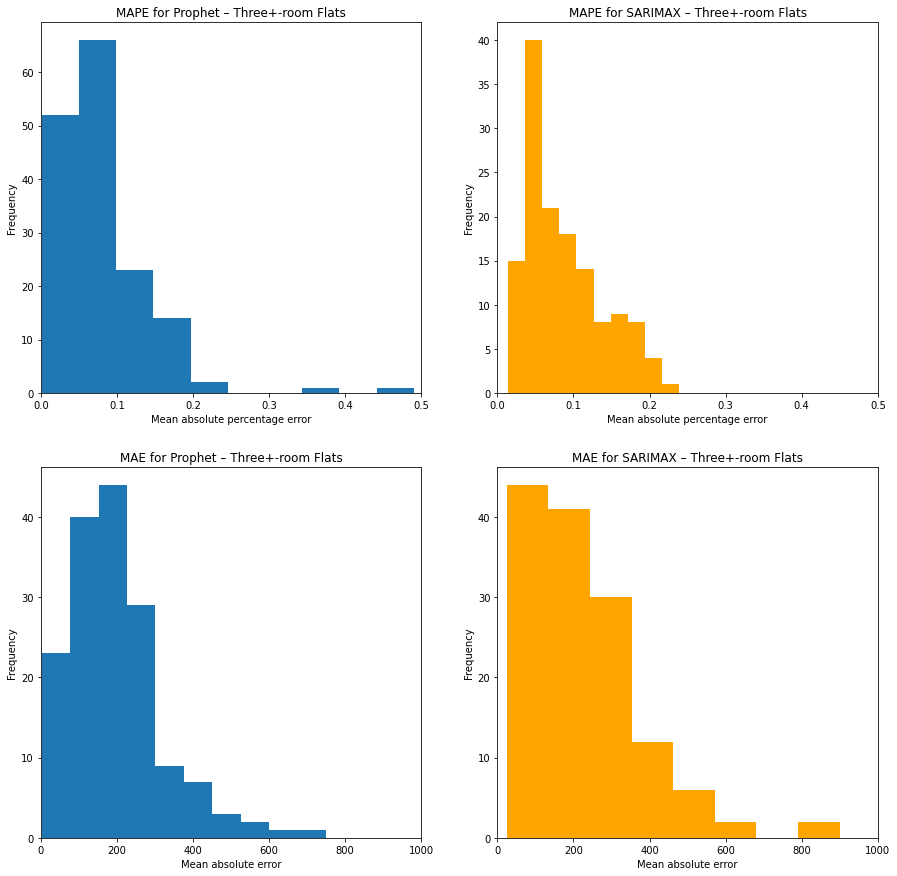

In [165]:
import matplotlib.pyplot as plt
# PROPHET 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))

ax2 = three_more_room["mpe"].plot.hist(ax=axes[0, 0])
ax21 = three_more_room["mae"].plot.hist(ax=axes[1, 0])
ax2.set_xlim(0,0.5)
ax21.set_xlim(0,1000)
ax2.set_xlabel("Mean absolute percentage error")
ax21.set_xlabel("Mean absolute error")
ax2.set_title("MAPE for Prophet – Three+-room Flats")
ax21.set_title("MAE for Prophet – Three+-room Flats")

ax1 = rm_plot_data["mape"].plot.hist(ax=axes[0,1], color="orange")
ax12 = rm_plot_data["mae"].plot.hist(ax=axes[1,1], color="orange")
ax1.set_xlim(0,0.5)
ax12.set_xlim(0,1000)
ax1.set_xlabel("Mean absolute percentage error")
ax12.set_xlabel("Mean absolute error")
ax1.set_title("MAPE for SARIMAX – Three+-room Flats")
ax12.set_title("MAE for SARIMAX – Three+-room Flats")
fig.savefig("figures/threemore-room(individual).png")


In [190]:
    print("Prophet")
    show_results(terrace_houses["mae"], terrace_houses["mpe"])
    print("\nSARIMAX")
    show_results(remove_over_100_mae, remove_over_100_mpe)

Prophet
Average MAE: 166.429
Average MPE: 0.072
Median MAE: 142.504
Median MPE: 0.065

SARIMAX
Average MAE: 178.865
Average MPE: 0.078
Median MAE: 155.140
Median MPE: 0.069
